## 1. Define question <br>

This project focuses on understanding the differences between attitudes to work around the world, and what drives those differences. Specifically:  <br> <br>
a) What different values systems exist around the globe (focused on attitudes to work)? <br>
b) What socio-economic factors influence a country's values system? <br>
c) How well can we predict a country's values system, based on these factors?

## 2. Get data

### Import necessary modules & set environment variables

In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from data_dictionary import *
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)

_random_state = 42

### Import data

In [2]:
df = pd.read_stata('./world-values-survey-data/WVS_Longitudinal_1981_2014_stata_v2015_04_18.dta', convert_categoricals=False) # index_col='S025', 

### Clean data

#### Check shape and nulls; inspect header

In [3]:
df.shape

(341271, 1410)

In [4]:
df.head()

,S001,S002,S002EVS,S003,S003A,S004,S006,S007,S007_01,S008,S009,S009A,S010,S010_01,S010_02,S010_03,S010_04,S011,S012,S013,S013B,S014,S015,S016,S017,S017A,S018,S018A,S019,S019A,S020,S021,S021A,S022,S023,S024,S024A,S025,S025A,S026,S027,S028,A001,A001_CO,A002,A002_CO,A003,A003_CO,A004,A004_CO,A005,A005_CO,A006,A006_CO,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A026_01,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A043_01,A043_01F,A043_F,A043B,A044,A045,A046,A047,A048,A049,A050,A050_01,A050_02,A050_03,A050_04,A051,A052,A053,A054,A055,A056,A057,A058,A059,A060,A061,A062,A063,A064,A065,A066,A067,A068,A069,A070,A071,A071B,A071C,A072,A073,A074,A075,A076,A077,A078,A079,A080,A080_F,A081,A082,A083,A084,A085,A086,A087,A088,A088B,A088C,A089,A090,A091,A092,A093,A094,A095,A096,A097,A097_F,A098,A099,A100,A101,A102,A103,A104,A105,A106,A106B,A106C,A107,A108,A109,A110,A111,A112,A113,A114,A115,A116,A117,A118,A119,A120,A121,A122,A123,A124_01,A124_02,A124_03,A124_04,A124_05,A124_06,A124_07,A124_08,A124_09,A124_10,A124_11,A124_12,A124_13,A124_14,A124_15,A124_16,A124_17,A124_18,A124_19,A124_20,A124_21,A124_22,A124_23,A124_24,A124_25,A124_26,A124_27,A124_28,A124_29,A124_30,A124_31,A124_32,A124_33,A124_34,A124_35,A124_36,A124_37,A124_38,A124_39,A124_40,A124_41,A124_42,A124_43,A124_44,A124_45,A124_46,A124_47,A124_48,A124_49,A124_50,A124_51,A124_52,A124_53,A124_54,A124_55,A124_56,A124_57,A124_58,A124_59,A124_60,A124_61,A165,...,G032,G033,G034,G035,G036,G037,G038,G039,G040,G041,G042,G043,G044,G045,G046,G047,G048,G049,G050,G051,H001,H002_01,H002_02,H002_03,H002_04,H002_05,H003_01,H003_02,H003_03,H004,H005,H006_01,H006_02,H006_03,H006_04,H006_05,H006_06,H007,H008_01,H008_02,H008_03,H008_04,I001,I002,U001A,U001B,U002A,U002B,U003A,U003B,U004A,U004B,U005A,U005B,U006A,U006B,V001,V001A,V002,V002A,V003,V004A,V004B,V004C,V004D,V004E,V004R,V005,V006,V006_2,V006_3,V006_4,V007A,V007B,V007C,V007D,V008,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,W001,W001A,W002A,W002B,W002C,W002D,W002E,W002R,W003,W004,W005,W005_2,W005_3,W005_4,W006A,W006B,W006C,W006D,W007,W008,W009,W010,W011,X001,X002,X002_01,X002_01A,X002_02,X002_02A,X002_03,X003,X003R,X003R2,X004,X005,X006,X006_01,X006_02,X007,X007_01,X007_02,X008,X009,X009_01,X010,X011,X011_01,X011_02,X011A,X012,X013,X014,X015,X016,X017,X018,X019,X020,X021,X022,X022_01,X022_02A,X022_02B,X022_03A,X022_03B,X022_04A,X022_04B,X022_05A,X022_05B,X022_06A,X022_06B,X023,X023R,X024,X024B,X025,X025A,X025B,X025C,X025CS,X025CSWVS,X025LIT,X025R,X026,X027,X028,X028_01,X029,X030,X031,X032,X032R,X032R_01,X033,X033R,X034,X034R,X034R_01,X035_2,X035_3,X035_4,X036,X036A,X036B,X036C,X036D,X037,X037_01,X037_02,X038,X039,X040,X041,X042_2,X042_3,X042_4,X043,X044,X045,X045B,X046,X047,X047A,X047A_01,X047B,X047B_01,X047C,X047C_01,X047CS,X047D,X047R,X048,X048A,X048B,X048C,X048D,X048E,X048F,X048G,X048WVS,X049,X049CS,X050,X051,X052,X053,X054,X055,Y001,Y002,Y003,Y010,Y011,Y012,Y013,Y014,Y020,Y021,Y022,Y023,Y024,TRADRAT5,survself
0,2,1,-4,392,392,-4.0,1.0,1,3.920120e+09,-4,JP,JP,-4.0,-4,-4,-4,-4,-4.0,-4,-4,-4,-4,-4,-4,1.089722,1.089722,0.905084,0.905084,1.357627,1.357627,1981,3.920121e+10,3.920121e+10,-4,-4,3921,3921,3921981,3921981,20150418,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2,-2,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,1,-2,-4,1,-4,1,0,-4,1,-4,0,0,-4,-4,1,0,0,0,0,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,0,-4,0,0,0,0,0,0,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,0,0,0,0,-4,0,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,0,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,

#### We can relabel the columns using the data dictionary found at  http://www.worldvaluessurvey.org/WVSDocumentationWVL.jsp

In [5]:
new_column_labels = []

for i in df.columns:
    new_column_labels.append(column_map_dictionary.get(i, i))

In [6]:
new_column_labels2 = []

for i in new_column_labels:
    new_column_labels2.append(column_map_dictionary.get(i.lower(), i))

In [7]:
df.columns = new_column_labels2

In [8]:
df.head()

,Study,Wave,EVS-wave,Country/region,Country/regions [with split ups],Set,Original respondent number,Unified respondent number,Unified respondent number (EVS/WVS LF),Interviewer number,S009,S009A,Total length of interview,Time of interview: start hour,Time of interview: start minute,Time of interview: end hour,Time of interview: end minute,Time at the end of interview,Date interview,Respondent interested during the interview,Interview privacy,Confidence respondent during the interview,On the whole respondent looked,Language in which interview was conducted,Weight,Weight [with split ups],Equilibrated weight-1000,Equilibrated weight-1000 [with split ups],Equilibrated weight-1500,Equilibrated weight-1500 [with split ups],Year survey,Country - wave - study - set - year,Country2 - wave - study - set - year,Year/month of start-fieldwork,Year/month of end-fieldwork,Country - wave,Country - wave [with split ups],Country - year,Country - year [with split ups],File version (yyyymmdd),split ballot,split oecd,Important in life: Family,Family important,Important in life: Friends,Friends important,Important in life: Leisure time,Leisure time,Important in life: Politics,Politics important,Important in life: Work,Work important,Important in life: Religion,Religion important,Service to others important in life,Feeling of happiness,State of health (subjective),Ever felt very excited or interested,Ever felt restless,Ever felt proud because someone complimented you,Ever felt very lonely or remote from other people,Ever felt pleased about having accomplished something,Ever felt bored,Ever felt on top of the world,Ever felt depressed or very unhappy,Ever felt that things were going your way,Ever felt upset because somebody criticized you,"When you are home, do you feel relaxed","When you are home, do you feel anxious","When you are home, do you feel happy","When you are home, do you feel aggressive","When you are home, do you feel secure",Respect and love for parents,Parents responsibilities to their children,Children responsibilities to their parents in need at expense of/not sacrifice own well-being,Important child qualities: good manners,Important child qualities: politeness and neatness,Important child qualities: independence,Important child qualities: hard work,Important child qualities: honesty,Important child qualities: feeling of responsibility,Important child qualities: patience,Important child qualities: imagination,Important child qualities: tolerance and respect for other people,Important child qualities: leadership,Important child qualities: self-control,Important child qualities: thrift saving money and things,Important child qualities: determination perseverance,Important child qualities: religious faith,Important child qualities: unselfishness,Important child qualities: obedience,Important child qualities: loyalty,Important child qualities: none,Flag variable: learn children at home: none,Flag variable: learn children at home,Important child qualities: Self-expression,What children should learn 1,What children should learn 2,Abortion when the mothers health is at risk,Abortion when child physically handicapped,Abortion when woman not married,Abortion if not wanting more children,Way of spending leisure time,Leisure time: meeting nice people,Leisure time: relaxing,Leisure time: doing as I want,Leisure time: learning something new,Spend leisure time: alone,Spend leisure time: with family,Spend leisure time: with friends,Spend leisure time: in a lively place,Spend leisure time: all equally,Spend leisure time with: don’t know,Spend time with parents or other relatives,Spend time with friends,Spend time with colleagues from work,"Spend time with people at your church, mosque or synagogue","Spend time with people at sport, culture, communal organization",How often discusses political matters with friends,"Persuading friends, relatives or fellow workers",Member: Belong to social welfare service for elderly,Member: Belong to religious organi

#### Note that the country is listed as a code (in 'Country/region' column). We want to add the name of the country

In [9]:
# Turn each country/ code combination into an item in a list, by splitting on new lines
country_list = country_list.split('\n')

# Create a list of country codes and country names
country_code_list = []
country_name_list = []
for country_pair in country_list:
    country_code_list.append(country_pair.split(':')[0])
    country_name_list.append(country_pair.split(':')[1])
    
# Turn the country code / name lookup into a dataframe, to allow a merge with the original dataframe
country_dictionary = {'country_code': country_code_list, 'country_name': country_name_list}
country_lookup = pd.DataFrame(country_dictionary)

In [10]:
# Merge country names into original dataframe
df['Country/region'] = df['Country/region'].astype(int) # match dtypes
country_lookup['country_code'] = country_lookup['country_code'].astype(int)
df = pd.merge(df, country_lookup, left_on='Country/region', right_on='country_code', how = 'left')
df.head()

,Study,Wave,EVS-wave,Country/region,Country/regions [with split ups],Set,Original respondent number,Unified respondent number,Unified respondent number (EVS/WVS LF),Interviewer number,S009,S009A,Total length of interview,Time of interview: start hour,Time of interview: start minute,Time of interview: end hour,Time of interview: end minute,Time at the end of interview,Date interview,Respondent interested during the interview,Interview privacy,Confidence respondent during the interview,On the whole respondent looked,Language in which interview was conducted,Weight,Weight [with split ups],Equilibrated weight-1000,Equilibrated weight-1000 [with split ups],Equilibrated weight-1500,Equilibrated weight-1500 [with split ups],Year survey,Country - wave - study - set - year,Country2 - wave - study - set - year,Year/month of start-fieldwork,Year/month of end-fieldwork,Country - wave,Country - wave [with split ups],Country - year,Country - year [with split ups],File version (yyyymmdd),split ballot,split oecd,Important in life: Family,Family important,Important in life: Friends,Friends important,Important in life: Leisure time,Leisure time,Important in life: Politics,Politics important,Important in life: Work,Work important,Important in life: Religion,Religion important,Service to others important in life,Feeling of happiness,State of health (subjective),Ever felt very excited or interested,Ever felt restless,Ever felt proud because someone complimented you,Ever felt very lonely or remote from other people,Ever felt pleased about having accomplished something,Ever felt bored,Ever felt on top of the world,Ever felt depressed or very unhappy,Ever felt that things were going your way,Ever felt upset because somebody criticized you,"When you are home, do you feel relaxed","When you are home, do you feel anxious","When you are home, do you feel happy","When you are home, do you feel aggressive","When you are home, do you feel secure",Respect and love for parents,Parents responsibilities to their children,Children responsibilities to their parents in need at expense of/not sacrifice own well-being,Important child qualities: good manners,Important child qualities: politeness and neatness,Important child qualities: independence,Important child qualities: hard work,Important child qualities: honesty,Important child qualities: feeling of responsibility,Important child qualities: patience,Important child qualities: imagination,Important child qualities: tolerance and respect for other people,Important child qualities: leadership,Important child qualities: self-control,Important child qualities: thrift saving money and things,Important child qualities: determination perseverance,Important child qualities: religious faith,Important child qualities: unselfishness,Important child qualities: obedience,Important child qualities: loyalty,Important child qualities: none,Flag variable: learn children at home: none,Flag variable: learn children at home,Important child qualities: Self-expression,What children should learn 1,What children should learn 2,Abortion when the mothers health is at risk,Abortion when child physically handicapped,Abortion when woman not married,Abortion if not wanting more children,Way of spending leisure time,Leisure time: meeting nice people,Leisure time: relaxing,Leisure time: doing as I want,Leisure time: learning something new,Spend leisure time: alone,Spend leisure time: with family,Spend leisure time: with friends,Spend leisure time: in a lively place,Spend leisure time: all equally,Spend leisure time with: don’t know,Spend time with parents or other relatives,Spend time with friends,Spend time with colleagues from work,"Spend time with people at your church, mosque or synagogue","Spend time with people at sport, culture, communal organization",How often discusses political matters with friends,"Persuading friends, relatives or fellow workers",Member: Belong to social welfare service for elderly,Member: Belong to religious organi

In [11]:
df['country_year'] = df['country_name'].astype(str) + '_' + df['Year survey'].astype(str)

#### Now, zoom in on the columns of interest:  What is important in a job?

In [12]:
job_qs = important_in_a_job
baseline_qs = ['Wave', 'Year survey', 'Country/region', 'country_name', 'country_year']
job_df = df[baseline_qs + job_qs]

In [13]:
job_df.head()

,Wave,Year survey,Country/region,country_name,country_year,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,Important in a job: pleasant people to work with,Important in a job: good chances for promotion,Important in a job: a useful job for society,Important in a job: meeting people,Important in a job: good physical working conditions,Important in a job: to have time off at the weekends,Important in a job: learning new skills,Important in a job: family friendly,Important in a job: have a say,Important in a job: people treated equally,Important in a job: none of these
0,1,1981,392,Japan,Japan_1981,0,0,1,1,0,0,0,0,1,0,1,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,1,1981,392,Japan,Japan_1981,1,0,0,1,0,1,0,1,1,1,1,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,1,1981,392,Japan,Japan_1981,0,0,0,0,0,0,0,0,0,0,1,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,1,1981,392,Japan,Japan_1981,0,0,0,0,0,0,0,0,0,0,1,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,1,1981,392,Japan,Japan_1981,0,0,1,0,1,1,0,0,0,0,0,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [14]:
# Count nulls
job_df.isnull().sum().sum()

3780

In [15]:
# Count values greater than or equal to zero (from the data dictionary, negative numbers indicate missing data)
(job_df[job_qs] >= 0).sum()

Important in a job: good pay                            151669
Important in a job: not too much pressure               151669
Important in a job: good job security                   151669
Important in a job: a respected job                     151669
Important in a job: good hours                          148933
Important in a job: an opportunity to use initiative    149647
Important in a job: generous holidays                   150699
Important in a job: that you can achieve something      148933
Important in a job: a responsible job                   151669
Important in a job: a job that is interesting           148933
Important in a job: a job that meets one´s abilities    150516
Important in a job: pleasant people to work with         20175
Important in a job: good chances for promotion           20175
Important in a job: a useful job for society             20175
Important in a job: meeting people                       17439
Important in a job: good physical working conditions   

In [16]:
# Focusing in on the columns with the fewest missing data points:
refined_job_qs = ['Important in a job: good pay',
 'Important in a job: not too much pressure',
 'Important in a job: good job security',
 'Important in a job: a respected job',
 'Important in a job: good hours',
 'Important in a job: an opportunity to use initiative',
 'Important in a job: generous holidays',
 'Important in a job: that you can achieve something',
 'Important in a job: a responsible job',
 'Important in a job: a job that is interesting',
 'Important in a job: a job that meets one´s abilities']

refined_job_df = df[baseline_qs + refined_job_qs].copy()

(refined_job_df[refined_job_qs] >= 0).sum()

Important in a job: good pay                            151669
Important in a job: not too much pressure               151669
Important in a job: good job security                   151669
Important in a job: a respected job                     151669
Important in a job: good hours                          148933
Important in a job: an opportunity to use initiative    149647
Important in a job: generous holidays                   150699
Important in a job: that you can achieve something      148933
Important in a job: a responsible job                   151669
Important in a job: a job that is interesting           148933
Important in a job: a job that meets one´s abilities    150516
dtype: int64

In [17]:
# Check how many people partially answered the questions
refined_job_df['number_of_jobs_qs_answered'] = (refined_job_df[refined_job_qs] >= 0).sum(axis = 1)

In [18]:
refined_job_df['number_of_jobs_qs_answered'].value_counts()

0     189602
11    144788
10      4145
8       2736
Name: number_of_jobs_qs_answered, dtype: int64

In [19]:
# Overall, most people answered all the questions (144k) or none (189k). 
# A small proportion (~6k) responsed to some but not all of the questions
# Dropping respondants who did not answer all questiosn will improve consistency and reduce bias, for a relatively small data loss
# Consequently, we will focus only on those respondants who answered all questions
mask = refined_job_df['number_of_jobs_qs_answered'] == 11
refined_job_df = refined_job_df[mask]

## 3. EDA

### Preview the data and look for correlations (clustering of input variables / multicolinearity)

In [20]:
# View dataframe
refined_job_df.head()

,Wave,Year survey,Country/region,country_name,country_year,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered
0,1,1981,392,Japan,Japan_1981,0,0,1,1,0,0,0,0,1,0,1,11
1,1,1981,392,Japan,Japan_1981,1,0,0,1,0,1,0,1,1,1,1,11
2,1,1981,392,Japan,Japan_1981,0,0,0,0,0,0,0,0,0,0,1,11
3,1,1981,392,Japan,Japan_1981,0,0,0,0,0,0,0,0,0,0,1,11
4,1,1981,392,Japan,Japan_1981,0,0,1,0,1,1,0,0,0,0,0,11


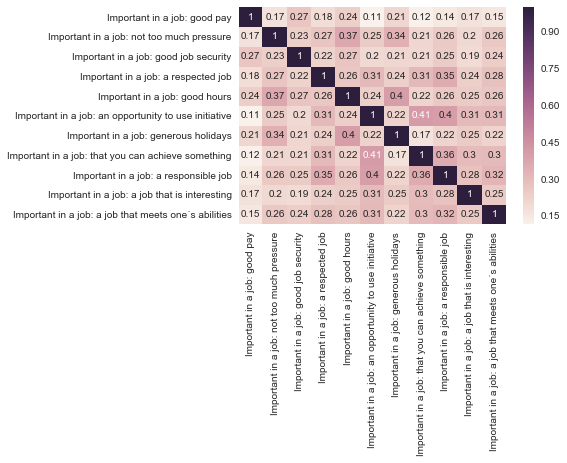

In [21]:
# Look at correlation matrix between different questions
sns.heatmap(refined_job_df[refined_job_qs].corr(), annot = True);

#### Though correlations are all < 0.5, we can see correlated clusters of variables:
- Achieving something, responsible job and opportunity to use initiative (correlations of ~0.4)
- Good hours, generous holidays, not too much pressure (correlations of ~0.35)

### Understand sample size

In [22]:
# View dataframe
refined_job_df.head()

,Wave,Year survey,Country/region,country_name,country_year,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered
0,1,1981,392,Japan,Japan_1981,0,0,1,1,0,0,0,0,1,0,1,11
1,1,1981,392,Japan,Japan_1981,1,0,0,1,0,1,0,1,1,1,1,11
2,1,1981,392,Japan,Japan_1981,0,0,0,0,0,0,0,0,0,0,1,11
3,1,1981,392,Japan,Japan_1981,0,0,0,0,0,0,0,0,0,0,1,11
4,1,1981,392,Japan,Japan_1981,0,0,1,0,1,1,0,0,0,0,0,11


In [23]:
# Summary statistics
country_counts = refined_job_df.groupby('country_year').count()
country_counts[refined_job_qs].describe()

,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308,1392.192308
std,556.828137,556.828137,556.828137,556.828137,556.828137,556.828137,556.828137,556.828137,556.828137,556.828137,556.828137
min,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
25%,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000,1007.750000
50%,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000,1200.500000
75%,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000
max,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000


In [24]:
# Summary
print(f'Each question was, on average, answered by {country_counts.iloc[:,0].mean():.0f} people in each wave, with a \
min of {country_counts.iloc[:,0].min():.0f} and a max of {country_counts.iloc[:,0].max():.0f}')

Each question was, on average, answered by 1392 people in each wave, with a min of 417 and a max of 3401


### See how responses evolve on a country-by-country level over time

In [25]:
# Aggregate
country_averages = refined_job_df.groupby('country_year').mean()
country_averages['country_year'] = country_averages.index
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year
country_year,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002
Argentina_1984,1.0,1984,32.0,0.862687,0.366169,0.528358,0.264677,0.560199,0.468657,0.371144,0.338308,0.331343,0.383085,0.352239,11.0,Argentina_1984
Argentina_1991,2.0,1991,32.0,0.840319,0.407186,0.632735,0.428144,0.435130,0.546906,0.299401,0.501996,0.581836,0.506986,0.584830,11.0,Argentina_1991


In [26]:
# Add country name column
country_averages['country_name'] = [country_averages.index[i][0:country_averages.index[i].find('_')] for i in range(0, len(country_averages.index))]

In [27]:
# Assess data availability
country_averages['country_name'].value_counts()[0:10]

Mexico         5
Japan          4
Argentina      4
Turkey         3
India          3
China          3
Chile          3
Spain          3
Albania        2
Philippines    2
Name: country_name, dtype: int64

In [28]:
country_averages['country_name'].value_counts().count()

64

#### Of the 64 countries included in the datset, 8 have data from three or more waves; we will focus on these

In [29]:
# Create sub-dfs for each of these countries
longitudinal_countries = ['Mexico', 'Japan', 'Argentina', 'India', 'China', 'Chile', 'Turkey','Spain']

In [30]:
for index, df in country_averages.groupby(country_averages.index):
    if index == 'Mexico':
        display(df)

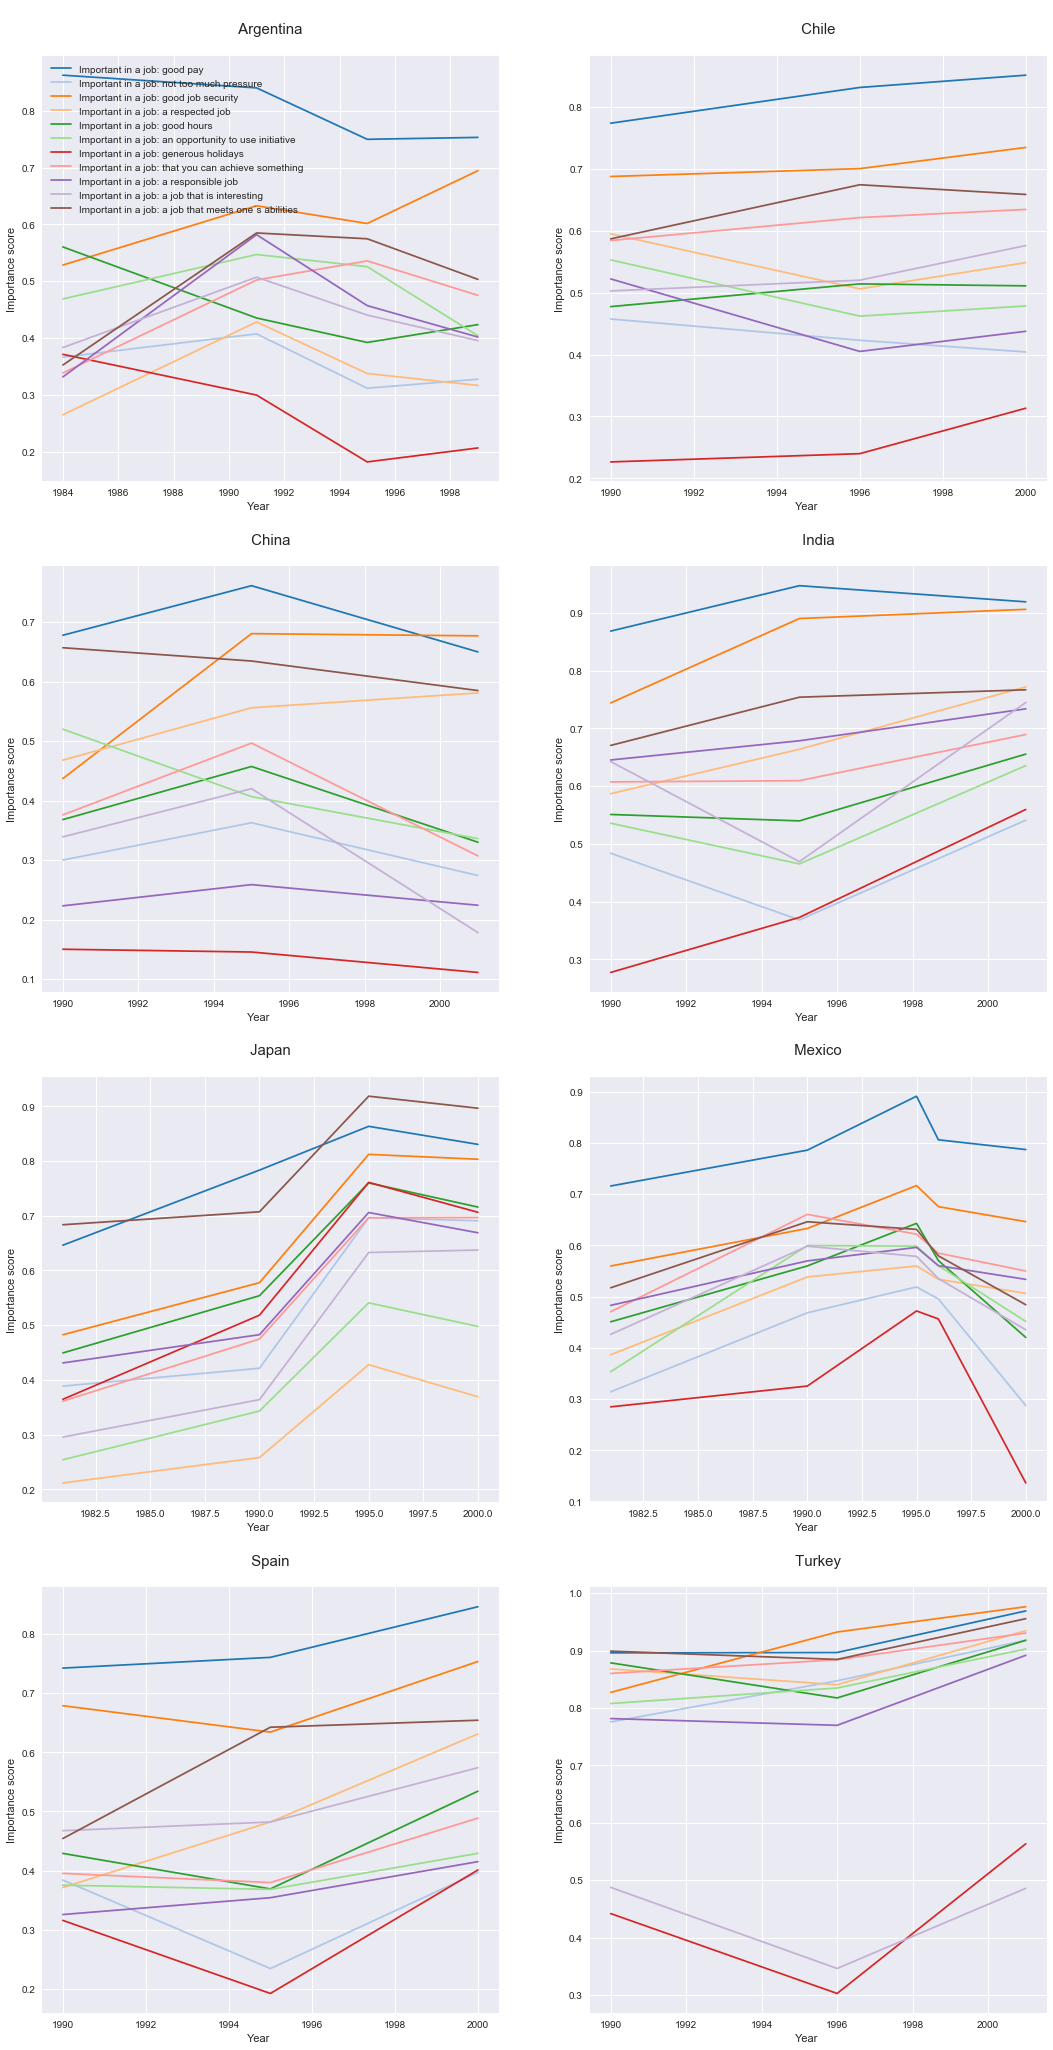

In [31]:
# Plot evolution of values over time

country_averages.index = country_averages['country_name']

n_cols = 2
n_rows = int(len(longitudinal_countries)//n_cols)
figure, ax = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(18,36))
i = 0 # this is a counter to tell matplotlib which axis to plot on
_cmap = plt.get_cmap('tab20')

for index, dataframe in country_averages.groupby(country_averages.index):
    if index in longitudinal_countries:
        ax[i//n_cols][i%n_cols].set_title(f"\n {index} \n", fontsize = 15)
        for j in range(0, len(refined_job_qs)): # this for loop is used to improve line colors on charts
            ax[i//n_cols][i%n_cols].plot(dataframe['Year survey'], dataframe[refined_job_qs[j]], c=_cmap.colors[j])
        ax[i//n_cols][i%n_cols].set_xlabel('Year', horizontalalignment = 'right')
        ax[i//n_cols][i%n_cols].set_ylabel('Importance score')
        if i == 0:
            ax[i//n_cols][i%n_cols].legend(refined_job_qs, )
        i +=1

#### Normalizing our data

In some countries (e.g., Japan, Mexico) the variables tend to trend up and down together. This could be an artefact of how the survey was administered: the value for each cell is the percent of respondants who mentioned something as important. In some years, the interviews may have been longer or more comprehensive than others. To account for this fact, we can look at the number of times an attribute was mentioned as a % of the total.

In [32]:
country_averages['total_mentions'] = country_averages[refined_job_qs].sum(axis = 1)
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions
country_name,,,,,,,,,,,,,,,,,,
Albania,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251
Albania,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000
Algeria,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402
Argentina,1.0,1984,32.0,0.862687,0.366169,0.528358,0.264677,0.560199,0.468657,0.371144,0.338308,0.331343,0.383085,0.352239,11.0,Argentina_1984,Argentina,4.826866
Argentina,2.0,1991,32.0,0.840319,0.407186,0.632735,0.428144,0.435130,0.546906,0.299401,0.501996,0.581836,0.506986,0.584830,11.0,Argentina_1991,Argentina,5.765469


In [33]:
for column in refined_job_qs:
    country_averages[f'normalized {column}']=country_averages[column]/country_averages['total_mentions'] * 100 
    # * 100 to get pct

In [34]:
normalized_refined_job_qs = [f'normalized {column}'for column in refined_job_qs]
country_averages['normalized total_mentions'] = country_averages[normalized_refined_job_qs].sum(axis = 1)

In [35]:
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0
Albania,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0
Algeria,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0
Argentina,1.0,1984,32.0,0.862687,0.366169,0.528358,0.264677,0.560199,0.468657,0.371144,0.338308,0.331343,0.383085,0.352239,11.0,Argentina_1984,Argentina,4.826866,17.872604,7.586065,10.946197,5.483405,11.605854,9.709338,7.689136,7.008864,6.864564,7.936508,7.297464,100.0
Argentina,2.0,1991,32.0,0.840319,0.407186,0.632735,0.428144,0.435130,0.546906,0.299401,0.501996,0.581836,0.506986,0.584830,11.0,Argentina_1991,Argentina,5.765469,14.575039,7.062489,10.974554,7.426000,7.547170,9.485892,5.193007,8.706941,10.091743,8.793491,10.143673,100.0


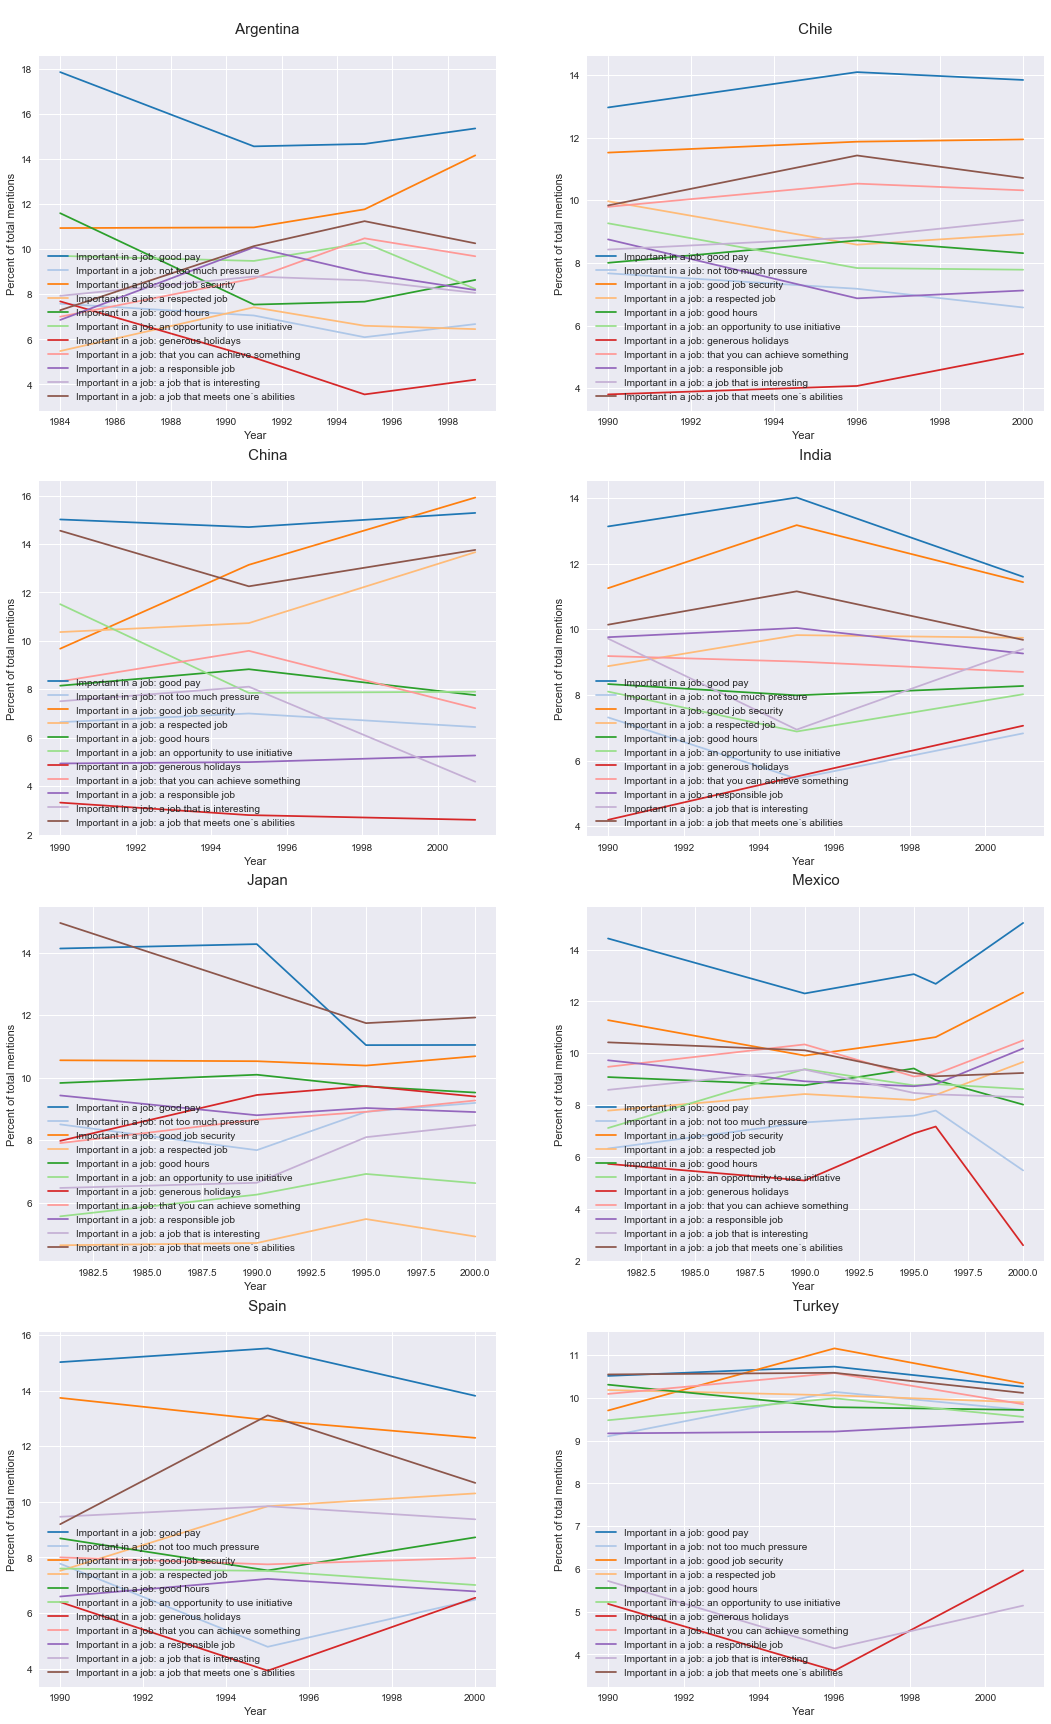

In [36]:
# Plot evolution of values over time

country_averages.index = country_averages['country_name']

n_cols = 2
n_rows = int(len(longitudinal_countries)//n_cols)
figure, ax = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(18,30))
i = 0 # this is a counter to tell matplotlib which axis to plot on
_cmap = plt.get_cmap('tab20')

for index, dataframe in country_averages.groupby(country_averages.index):
    if index in longitudinal_countries:
        ax[i//n_cols][i%n_cols].set_title(f"\n {index} \n", fontsize = 15)
        for j in range(0, len(normalized_refined_job_qs)): # this for loop is used to improve line colors on charts
            ax[i//n_cols][i%n_cols].plot(dataframe['Year survey'], dataframe[normalized_refined_job_qs[j]], c=_cmap.colors[j])
        ax[i//n_cols][i%n_cols].set_xlabel('Year', horizontalalignment = 'right')
        # ax[i//n_cols][i%n_cols].set_xlim(xmin = 1980)
        ax[i//n_cols][i%n_cols].set_ylabel('Percent of total mentions')
        ax[i//n_cols][i%n_cols].legend(refined_job_qs, loc = 'lower left')
        i +=1

#### Feature engineering for clustering analysis

As noted above, we can see that certain variables are correlated:
- Achieving something, responsible job and opportunity to use initiative (correlations of ~0.4)
- Good hours, generous holidays, not too much pressure (correlations of ~0.35)

Using a methodology similar to PCA, we can create new features to reduce the dimensionality of our features.

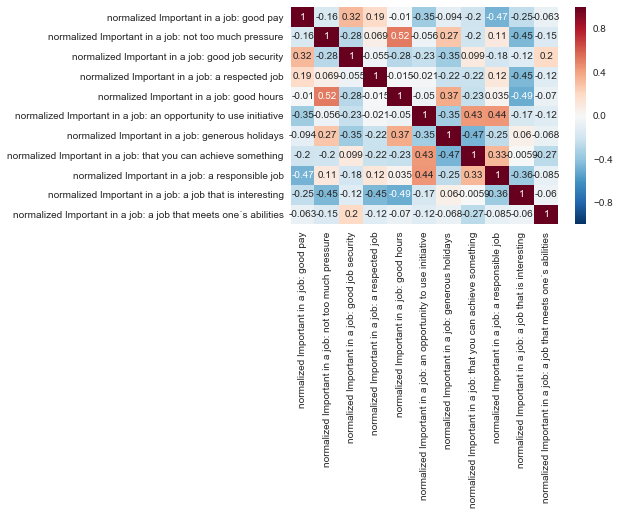

In [37]:
# Look at correlation matrix between different questions
sns.heatmap(country_averages[normalized_refined_job_qs].corr(), annot = True);

In [38]:
# Create new features

# Achieving_responsible_initiative

country_averages['normalized achieving_responsible_initiative'] = \
    country_averages['normalized Important in a job: that you can achieve something'] + \
    country_averages['normalized Important in a job: a responsible job'] + \
    country_averages['normalized Important in a job: an opportunity to use initiative']

# Hours_holidays_pressure

country_averages['normalized hours_holidays_pressure'] = \
    country_averages['normalized Important in a job: good hours'] + \
    country_averages['normalized Important in a job: generous holidays'] + \
    country_averages['normalized Important in a job: not too much pressure']

In [39]:
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408
Albania,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452
Algeria,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868
Argentina,1.0,1984,32.0,0.862687,0.366169,0.528358,0.264677,0.560199,0.468657,0.371144,0.338308,0.331343,0.383085,0.352239,11.0,Argentina_1984,Argentina,4.826866,17.872604,7.586065,10.946197,5.483405,11.605854,9.709338,7.689136,7.008864,6.864564,7.936508,7.297464,100.0,23.582766,26.881055
Argentina,2.0,1991,32.0,0.840319,0.407186,0.632735,0.428144,0.435130,0.546906,0.299401,0.501996,0.581836,0.506986,0.584830,11.0,Argentina_1991,Argentina,5.765469,14.575039,7.062489,10.974554,7.426000,7.547170,9.485892,5.193007,8.706941,10.091743,8.793491,10.143673,100.0,28.284577,19.802666


In [40]:
country_averages.shape

(104, 32)

In [41]:
country_averages['normalized achieving_responsible_initiative'].mean()

25.398708958475307

In [42]:
country_averages['normalized hours_holidays_pressure'].mean()

20.278564639572803

In [43]:
country_averages[normalized_refined_job_qs].mean().sort_values(ascending=False)

normalized Important in a job: good pay                            13.585293
normalized Important in a job: good job security                   11.864896
normalized Important in a job: a job that meets one´s abilities    10.681074
normalized Important in a job: a job that is interesting           10.071307
normalized Important in a job: that you can achieve something       9.724731
normalized Important in a job: good hours                           8.396740
normalized Important in a job: a respected job                      8.120157
normalized Important in a job: an opportunity to use initiative     7.863789
normalized Important in a job: a responsible job                    7.810189
normalized Important in a job: not too much pressure                6.757344
normalized Important in a job: generous holidays                    5.124481
dtype: float64

Together, these two features account for ~45% of the variance. "Good pay" and "good job security" are also important, accounting for ~14% and ~12% of responses respectively. In addition, they are correlated (0.32) so we'll try engineering a new feature combining both of these.

In [44]:
# Security_pay

country_averages['normalized security_pay'] = \
    country_averages['normalized Important in a job: good job security'] + \
    country_averages['normalized Important in a job: good pay']

In [45]:
country_averages['normalized security_pay'].mean()

25.450188769249337

In [46]:
engineered_job_attributes = ['normalized achieving_responsible_initiative', 
                             'normalized hours_holidays_pressure', 
                             'normalized security_pay']

Now, our three engineered features account for ~75% of responses, using only three features vs. the original eleven. While this is not as mathematically rigorous as PCA (in terms of maximizing variance captured), creating meaningful combinations of variables helps us maintain interpretability.

#### Clustering analysis

In [47]:
# Write a plotter function

def plotter(df, input_cols, \
            k_means_n_clusters = 3, agglom_n_clusters = 3, \
            dbscan_eps = 0.5, dbscan_min_samples = 5, n_rows = 1, n_cols = 3, _cmap = plt.get_cmap('tab20')):
    '''function to visualize kmean, agglomerative and dbscan clustering
    args: dataframe, input_cols --> to pull in from df, 
    kwargs: k_means_n_clusters, agglom_n_clusters, dbscan_eps, dbscan_min_samples, n_rows, n_cols --> rows/ cols of subplots, _cmap'''
    # pull out columns to plot and scale
    cols_to_plot = df[input_cols]
    figure, ax = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(18,5))
    # k means
    kmeans = KMeans(n_clusters=k_means_n_clusters)
    kmeans.fit(cols_to_plot)
    df['kmeans_labels'] = kmeans.labels_
    for index, sub_dataframe in df.groupby('kmeans_labels'):
        ax[0].set_title("K means")
        ax[0].scatter(sub_dataframe[input_cols[0]], sub_dataframe[input_cols[1]], c=_cmap.colors[index], label = f"Index {index}")
        ax[0].set_xlabel(input_cols[0])
        ax[0].set_ylabel(input_cols[1])
        ax[0].legend()
    # agglom
    agglom = AgglomerativeClustering(n_clusters=agglom_n_clusters)
    agglom.fit(cols_to_plot)
    df['agglom_labels'] = agglom.labels_
    for index, sub_dataframe in df.groupby('agglom_labels'):
        ax[1].set_title("Agglomerative clustering")
        ax[1].scatter(sub_dataframe[input_cols[0]], sub_dataframe[input_cols[1]], c=_cmap.colors[index], label = f"Index {index}")
        ax[1].set_xlabel(input_cols[0])
        ax[1].set_ylabel(input_cols[1])
        ax[1].legend()
    # dbscan
    dbmodel = DBSCAN(eps = dbscan_eps, min_samples=dbscan_min_samples)
    dbmodel.fit(cols_to_plot)
    df['dbscan_labels'] = dbmodel.labels_
    for index, sub_dataframe in df.groupby('dbscan_labels'):
        ax[2].set_title("DBSCAN")
        ax[2].scatter(sub_dataframe[input_cols[0]], sub_dataframe[input_cols[1]], c=_cmap.colors[index], label = f"Index {index}")
        ax[2].set_xlabel(input_cols[0])
        ax[2].set_ylabel(input_cols[1])
        ax[2].legend()

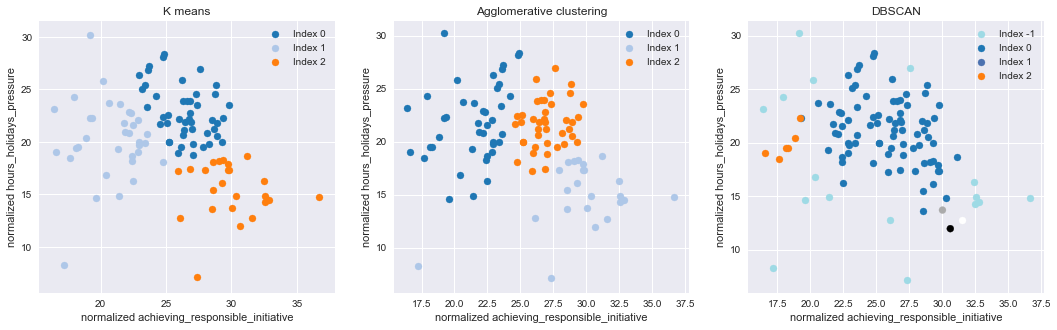

In [48]:
# Plot countries, using different clustering algorithms and variables
plotter(df = country_averages, 
        input_cols = ['normalized achieving_responsible_initiative', 'normalized hours_holidays_pressure'],
        k_means_n_clusters = 3, agglom_n_clusters = 3, dbscan_eps = 2)

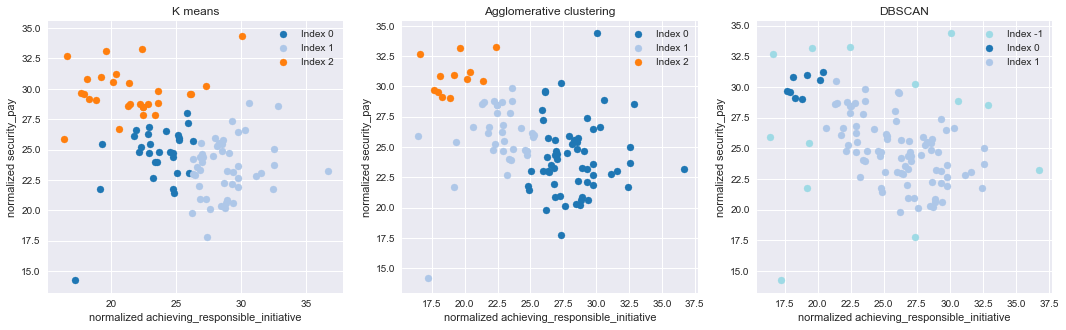

In [49]:
plotter(df = country_averages, 
        input_cols = ['normalized achieving_responsible_initiative', 'normalized security_pay'],
        k_means_n_clusters = 3, agglom_n_clusters = 3, dbscan_eps = 2)

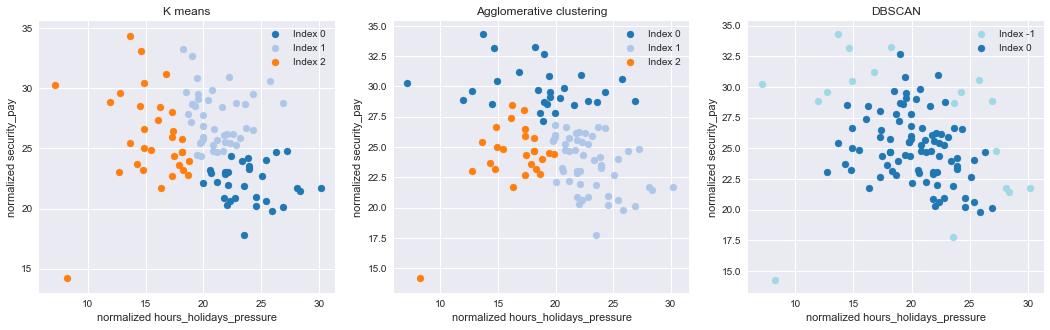

In [50]:
plotter(df = country_averages, 
        input_cols = ['normalized hours_holidays_pressure', 'normalized security_pay'],
        k_means_n_clusters = 3, agglom_n_clusters = 3, dbscan_eps = 2)

#### The top left chart (kmeans clustering with the two axes as achieving/ responsible/ initiative and hours/ holidays/ pressure accounts) provides the best visual separation. Proceeding with this...

In [51]:
# Modify our plotter to focus on k-means and add point labels

def k_means_plotter(df, input_cols, k_means_n_clusters = 3, n_rows = 1, n_cols = 1, _cmap = plt.get_cmap('tab20')):
    '''function to visualize kmean clustering
    args: dataframe, input_cols --> to pull in from df, agglom_n_clusters, dbscan_eps, dbscan_min_samples
    kwargs: k_means_n_clusters = 3, n_rows = 1, n_cols =1 --> rows/ cols of subplots, _cmap = plt.get_cmap('tab20')'''
    # pull out columns to plot and scale
    cols_to_plot = df[input_cols]
    figure, ax = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(18,11))
    # k means
    kmeans = KMeans(n_clusters=k_means_n_clusters, random_state=_random_state)
    kmeans.fit(cols_to_plot)
    df['kmeans_labels'] = kmeans.labels_
    for index, sub_dataframe in df.groupby('kmeans_labels'):
        ax.set_title("\n Country value systems\n ", size = 18)
        ax.scatter(sub_dataframe[input_cols[0]], sub_dataframe[input_cols[1]], c=_cmap.colors[index], label = f"Index {index}")
        ax.set_xlabel('% of responses focused on achievement', size = 14)
        ax.tick_params(labelsize = 14)
        #ax.set_xlim(xmax = 33)
        ax.set_ylabel('% of responses focused on lifestyle', size = 14)
        for j, k in sub_dataframe['country_year'].iteritems():
            x = sub_dataframe[input_cols[0]][j]+.1
            y = sub_dataframe[input_cols[1]][j]+.05
            label = k
            ax.annotate(label, (x, y), rotation= 20, ha = 'left', va = 'bottom', size = 10)
        ax.legend(["Balanced","Achievement","Lifestyle"], fontsize = 12)

In [52]:
# Reset index to unique values
country_averages.index = country_averages['country_year']

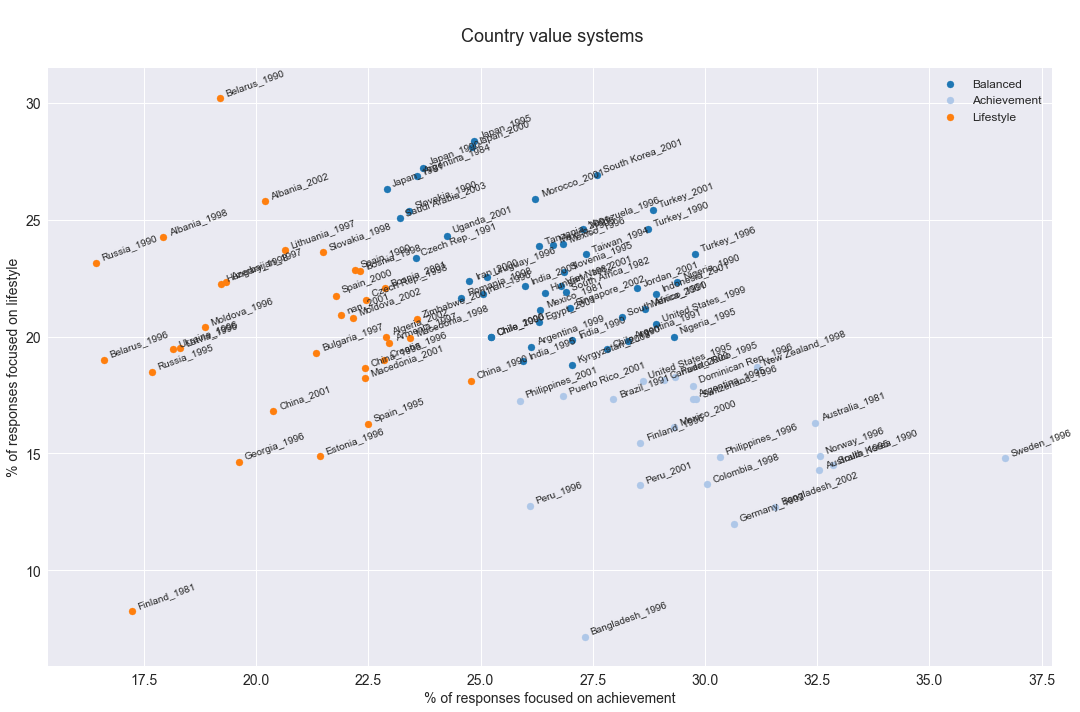

In [53]:
k_means_plotter(df = country_averages, 
        input_cols = ['normalized achieving_responsible_initiative', 'normalized hours_holidays_pressure'])

In [153]:
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle


In [290]:
# Modify our plotter to plot country paths

def k_means_time_series_plotter(df, input_cols, k_means_n_clusters = 3, n_rows = 1, n_cols = 1, _cmap = plt.get_cmap('tab20')):
    '''function to visualize kmean clustering
    args: dataframe, input_cols --> to pull in from df, agglom_n_clusters, dbscan_eps, dbscan_min_samples
    kwargs: k_means_n_clusters = 3, n_rows = 1, n_cols =1 --> rows/ cols of subplots, _cmap = plt.get_cmap('tab20')'''
    # pull out columns to plot and scale
    cols_to_plot = df[input_cols]
    figure, ax = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(18,11))
    # k means
    kmeans = KMeans(n_clusters=k_means_n_clusters, random_state=_random_state)
    kmeans.fit(cols_to_plot)
    df['kmeans_labels'] = kmeans.labels_
    for j, (index, sub_dataframe) in enumerate(df.groupby('country_name')):
        ax.plot(sub_dataframe[input_cols[0]], sub_dataframe[input_cols[1]], marker = 'o', label = '_nolegend_', c=_cmap.colors[int(int(sub_dataframe['kmeans_labels'].mean())*2)])      
        if j % 3 == 0 or j % 3 == 2 or j % 3 == 1:
            ax.annotate(f"{index}", (sub_dataframe[input_cols[0]].iloc[0]+.1, sub_dataframe[input_cols[1]].iloc[0]+0.05), rotation= 45, ha = 'left', va = 'bottom', size = 13)
    ax.set_title("\n Country value systems\n ", size = 18)     
    # Legend
    ax.plot(-10, - 10, label = "Lifestyle", c=_cmap.colors[0], marker = 'o')
    ax.plot(-10, - 10, label = "Balanced", c=_cmap.colors[2], marker = 'o')
    ax.plot(-10, - 10, label = "Achievement", c=_cmap.colors[4], marker = 'o')
    ax.legend(fontsize = 13)
    # Axes
    ax.set_xlim(xmin = 16)
    ax.set_ylim(ymin = 5)
    ax.set_xlabel('% of responses focused on achievement', size = 15)
    ax.set_ylabel('% of responses focused on lifestyle', size = 15)
    ax.tick_params(labelsize = 15)



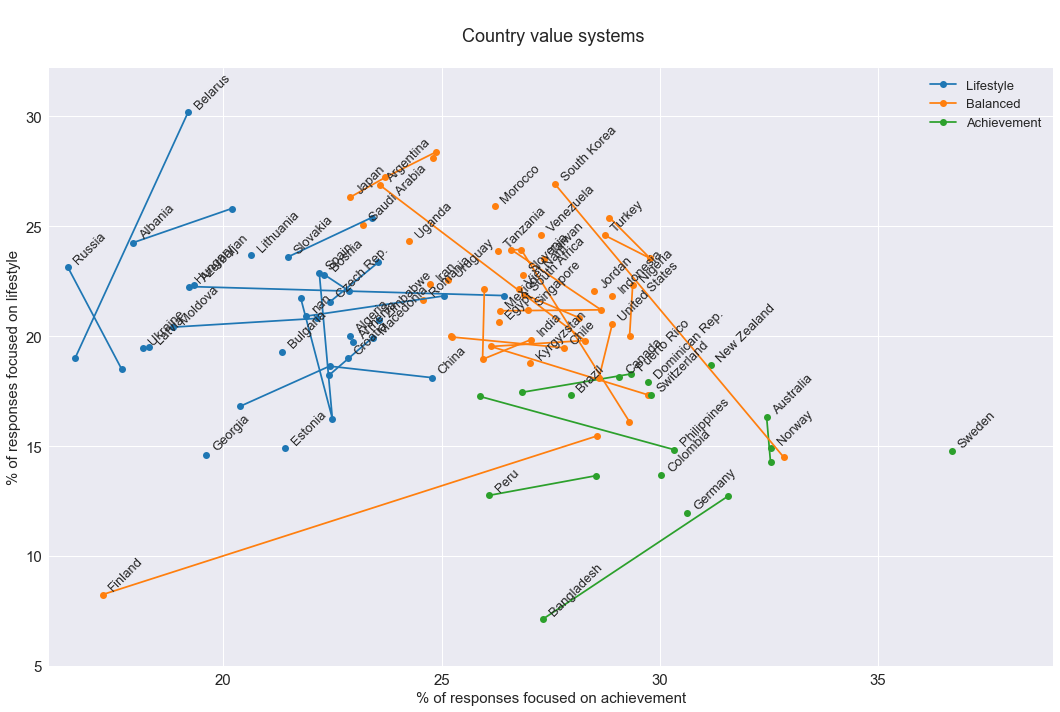

In [291]:
k_means_time_series_plotter(df = country_averages, 
        input_cols = ['normalized achieving_responsible_initiative', 'normalized hours_holidays_pressure'])

#### The clustering analysis identifies three groups:
- **The lifestyle group**: Countries where people are less concerned with having a high-achieving job and moderately concerned about lifestyle (vacations, hours, pressure) - including Russia, Albania and Slovakia
- **The achievement group**: Countries where people want a high-achieving job and care less about lifestyle - including Norway, Sweden and Australia
- **The balanced group**: Countries that balance achievement with lifestyle - including Turkey, Morocco and South Korea

#### Next, we will use multi-class logistic regression to see if we can predict a country's cluster based on economic variables.

#### Two notes:
- The boundaries between the groups are somewhat fuzzy (e.g., the U.S. in 1990 could also be assigned to the high-achievement group
- Many countries (for example Japan and Turkey) are fairly stable in values over time. Building on this analysis, we could look at what drives changes.

In [54]:
# Merge in labels

cluster_labels_df = pd.DataFrame([{'kmeans_labels': 1, 'kmeans_value_cluster' :'achievement'},
                                  {'kmeans_labels': 2, 'kmeans_value_cluster' :'lifestyle'},
                                  {'kmeans_labels': 0, 'kmeans_value_cluster' :'balanced'}])

country_averages = pd.merge(country_averages, cluster_labels_df, on = 'kmeans_labels')
country_averages.index = country_averages['country_year']

In [55]:
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle


In [56]:
# Confirm value clusters correctly mapped by looking at one example from each cluster
balanced_check = country_averages.loc['Uganda_2001','kmeans_value_cluster'] # balanced cluster
achievement_check = country_averages.loc['Peru_1996','kmeans_value_cluster'] # achievement cluster
lifestyle_check = country_averages.loc['Finland_1981','kmeans_value_cluster'] # lifestyle cluster

balanced_check, achievement_check, lifestyle_check

('balanced', 'achievement', 'lifestyle')

In [57]:
country_averages.shape

(104, 37)

### Logistic regression

#### Merge in indicator data - GDP

In [58]:
# Read in dataframe (from https://data.worldbank.org/, accessed July 2018)
gdp_df = pd.read_csv('./indicator_data/World_bank_GDP_per_cap_PPP_df.csv')

In [59]:
gdp_df.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35973.780510,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1913.160644,1937.235365,1926.357336,1944.117005,1980.516177
2,Angola,2217.438380,2243.546096,2091.590164,1574.909779,1578.440193,1797.522525,2019.744617,2144.35083,2208.517559,2227.240941,2277.374611,2349.731596,2620.884723,2698.044285,2948.770248,3550.720284,4202.208484,5128.353450,5743.098881,5718.685523,5778.380803,5911.254092,6110.423392,6403.767556,6591.538820,6631.618694,6440.990242,6388.960022
3,Albania,2722.280344,1992.560528,1902.751280,2148.099954,2390.531021,2782.093734,3109.943347,2838.04492,3209.615372,3690.682981,4029.016971,4457.111638,4754.653697,5114.721695,5522.982134,5942.884009,6631.835687,7291.239751,8228.337106,8813.252003,9637.345368,10207.764700,10526.241220,10570.953000,11259.264500,11334.220930,11559.300840,12020.690730
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Check shape of dataframe
gdp_df.shape

(264, 29)

In [61]:
# Check percent nulls
print(f'{gdp_df.isnull().sum().sum()*100/(gdp_df.shape[0]*gdp_df.shape[1]):.0f}% null')

13% null


In [62]:
# The country_averages df has a two-level index (country_year). We need to stack our gdp dataframe to match

In [63]:
gdp_df.index = gdp_df['Country Name']
gdp_df.drop('Country Name', axis = 1, inplace = True)

gdp_df = pd.DataFrame(gdp_df.stack(), columns=["GDP per capita, PPP"])

gdp_df.reset_index(inplace=True)

gdp_df.index = gdp_df['Country Name'] + "_" + gdp_df['level_1']

gdp_df.drop(['Country Name', 'level_1'], axis = 1, inplace= True)

gdp_df.head()

,"GDP per capita, PPP"
Aruba_2011,35973.780510
Afghanistan_2002,875.517610
Afghanistan_2003,922.829449
Afghanistan_2004,916.334475
Afghanistan_2005,1011.595524


In [64]:
country_averages.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle


In [65]:
country_averages.shape

(104, 37)

In [66]:
# Check our country_averages df has no nulls
assert country_averages.isnull().sum().sum() == 0

In [67]:
# Merge in GDP information

In [68]:
job_and_gdp_df = pd.merge(country_averages, gdp_df, how = 'left', left_index = True, right_index= True)

In [69]:
# Preview new dataframe

In [70]:
job_and_gdp_df.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster,"GDP per capita, PPP"
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle,3209.615372
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle,4754.653697
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle,8911.680680
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle,1843.378545
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle,2634.158631


**Assess introduction of null values**

We had introduced 30 nulls, out of 104 values. Refering to the null values using "job_and_gdp_df.sort_values('GDP per capita, PPP', na_position='first').head(15)" we can fix many of these by matching our country names to country names in the World Bank database (e.g., Dominican Republic vs. Dominican Rep.). Post-processing, 11 nulls remain. These are mostly due to timing, as the World Values Survey was administered in a few countries before 1990 whereas the World Bank PPP GDP figures begin in 1990.

In [71]:
job_and_gdp_df['Wave'].count(), job_and_gdp_df['GDP per capita, PPP'].isnull().sum()

(104, 11)

We will drop the nulls from our dataframe going forwards. For easy reference, we will save the dataframe with nulls as job_and_gdp_df_original.

In [72]:
job_and_gdp_df_original = job_and_gdp_df
job_and_gdp_df = job_and_gdp_df.dropna()

In [73]:
job_and_gdp_df.shape, job_and_gdp_df_original.shape

((93, 38), (104, 38))

#### Merge in indicator data - GINI

In [74]:
# Read in dataframe (from https://data.worldbank.org/, accessed July 2018)
gini_df = pd.read_csv('./indicator_data/gini.csv')

In [75]:
# Preview data
gini_df.head()

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Impute nulls
gini_df.index = gini_df['Country Name']
gini_df.drop('Country Name', axis = 1, inplace=True)
gini_df.fillna(method = 'ffill', axis=1, inplace=True)         # first try a forward fill (i.e., base on the last available value)
gini_df.fillna(method = 'backfill', axis=1, inplace= True)     # next try a backward fill (i.e., base on the next available value)
gini_df.fillna(value = gini_df.mean(), inplace=True)           # where no data is available fill with the dataframe mean

In [77]:
gini_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,40.364024,40.364024,40.366463,40.370122,40.366463,40.362805,40.267073,40.27622,40.270122,40.348171,40.268293,40.275,40.279268,40.335366,40.267683,40.365854,40.348171,40.393902,40.511585,40.503049,40.329268,40.303049,40.070732,39.816463,39.771951,39.877439,39.55061,39.32378,39.206707,38.87439,38.914024,38.753049,38.712195,38.596951,38.492683,38.453659,38.418293,38.418293
Afghanistan,40.364024,40.364024,40.366463,40.370122,40.366463,40.362805,40.267073,40.27622,40.270122,40.348171,40.268293,40.275,40.279268,40.335366,40.267683,40.365854,40.348171,40.393902,40.511585,40.503049,40.329268,40.303049,40.070732,39.816463,39.771951,39.877439,39.55061,39.32378,39.206707,38.87439,38.914024,38.753049,38.712195,38.596951,38.492683,38.453659,38.418293,38.418293
Angola,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.70000,42.700000,42.700000,42.700000,42.700,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.70000,42.70000,42.700000,42.70000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000,42.700000
Albania,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,31.700000,31.700000,31.700000,30.600000,30.60000,30.60000,30.000000,30.00000,30.000000,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
Andorra,40.364024,40.364024,40.366463,40.370122,40.366463,40.362805,40.267073,40.27622,40.270122,40.348171,40.268293,40.275,40.279268,40.335366,40.267683,40.365854,40.348171,40.393902,40.511585,40.503049,40.329268,40.303049,40.070732,39.816463,39.771951,39.877439,39.55061,39.32378,39.206707,38.87439,38.914024,38.753049,38.712195,38.596951,38.492683,38.453659,38.418293,38.418293


In [78]:
# The country_averages df has a two-level index (country_year). We need to stack our gini dataframe to match

In [79]:
gini_df = pd.DataFrame(gini_df.stack(), columns=["GINI coefficient"])

gini_df.reset_index(inplace=True)

gini_df.index = gini_df['Country Name'] + "_" + gini_df['level_1']

gini_df.drop(['Country Name', 'level_1'], axis = 1, inplace= True)

gini_df.head()

,GINI coefficient
Aruba_1980,40.364024
Aruba_1981,40.364024
Aruba_1982,40.366463
Aruba_1983,40.370122
Aruba_1984,40.366463


In [80]:
# Check our country_averages df has no nulls
assert country_averages.isnull().sum().sum() == 0

In [81]:
# Merge in GINI information

job_and_indicator_df = pd.merge(job_and_gdp_df, gini_df, how = 'left', left_index = True, right_index= True)

In [82]:
# Preview new dataframe

job_and_indicator_df.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster,"GDP per capita, PPP",GINI coefficient
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle,3209.615372,27.0
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle,4754.653697,31.7
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle,8911.680680,35.3
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle,1843.378545,36.2
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle,2634.158631,34.7


**Assess introduction of null values**

In [83]:
job_and_indicator_df.isnull().sum().sum()

0

- We had introduced 22 nulls, out of 93 values. We can fix many of these by matching our country names to country names in the World Bank database (e.g., Dominican Republic vs. Dominican Rep.). 
- Post-processing, 5 nulls remained. These are due to a handful of countries that do not report GINI scores (New Zealand, Puerto Rico, Saudi Arabia, Singapore)
- These remaining nulls were imputed with the average GINI coeff across all countries, leading to no additional nulls being inserted into our data

#### Merge in indicator data - primary school completion

In [84]:
# Read in dataframe (from https://data.worldbank.org/, accessed July 2018)
primary_completion_df = pd.read_csv('./indicator_data/primary_completion.csv')

In [85]:
# Preview data
primary_completion_df.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.619118,97.142860,94.404068,94.755241,90.215919,90.559898,88.197968,93.186119,95.588242,95.133034,96.242577,94.786102,NaN,NaN,96.570641,101.180557,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,16.794571,NaN,NaN,17.43013,19.107969,NaN,26.61916,33.06739,NaN,NaN,18.200041,18.909081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.069651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.09705,36.053768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.270191,38.839180,39.806419,46.086109,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.024391,NaN,NaN,NaN,97.073212,96.880661,NaN,94.902428,93.870880,NaN,NaN,96.629097,92.830223,91.512283,89.237343,93.277008,98.911697,90.974411,105.002121,104.468193,105.604103,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Impute nulls
primary_completion_df.index = primary_completion_df['Country Name']
primary_completion_df.drop('Country Name', axis = 1, inplace=True)
primary_completion_df.fillna(method = 'ffill', axis=1, inplace=True)         # first try a forward fill (i.e., base on the last available value)
primary_completion_df.fillna(method = 'backfill', axis=1, inplace= True)     # next try a backward fill (i.e., base on the next available value)

primary_completion_df.fillna(value = 100, inplace=True)           # three countries have no data available for any years:
# the United States, Australia and Bosnia. Since primary education is compulsory and free in these countries,
# we impute a value of close to 100%

In [87]:
primary_completion_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,101.619118,97.142860,94.404068,94.755241,90.215919,90.559898,88.197968,93.186119,95.588242,95.133034,96.242577,94.786102,94.786102,94.786102,96.570641,101.180557,101.180557,101.180557,101.180557
Afghanistan,16.794571,16.794571,16.794571,16.794571,16.794571,16.794571,16.794571,17.430130,19.107969,19.107969,26.619160,33.067390,33.067390,33.067390,18.200041,18.909081,18.909081,18.909081,18.909081,18.909081,18.909081,18.909081,18.909081,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651,29.069651
Angola,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,41.097050,36.053768,36.053768,36.053768,36.053768,36.053768,36.053768,36.053768,36.053768,36.053768,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,28.555300,39.270191,38.839180,39.806419,46.086109,46.086109,46.086109,46.086109,46.086109,46.086109,46.086109
Albania,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,92.024391,97.073212,96.880661,96.880661,94.902428,93.870880,93.870880,93.870880,96.629097,92.830223,91.512283,89.237343,93.277008,98.911697,90.974411,105.002121,104.468193,105.604103,105.604103
Andorra,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [88]:
# The country_averages df has a two-level index (country_year). We need to stack our education dataframe to match

In [89]:
primary_completion_df = pd.DataFrame(primary_completion_df.stack(), columns=["Primary completion rate"])

primary_completion_df.reset_index(inplace=True)

primary_completion_df.index = primary_completion_df['Country Name'] + "_" + primary_completion_df['level_1']

primary_completion_df.drop(['Country Name', 'level_1'], axis = 1, inplace= True)

primary_completion_df.head()

,Primary completion rate
Aruba_1970,101.619118
Aruba_1971,101.619118
Aruba_1972,101.619118
Aruba_1973,101.619118
Aruba_1974,101.619118


In [90]:
# Check our country_averages df has no nulls
assert job_and_indicator_df.isnull().sum().sum() == 0

In [91]:
# Merge in GINI information

job_and_indicator_df = pd.merge(job_and_indicator_df, primary_completion_df, how = 'left', left_index = True, right_index= True)

In [92]:
# Preview new dataframe

job_and_indicator_df.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster,"GDP per capita, PPP",GINI coefficient,Primary completion rate
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle,3209.615372,27.0,92.024391
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle,4754.653697,31.7,96.880661
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle,8911.680680,35.3,87.843491
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle,1843.378545,36.2,93.895500
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle,2634.158631,34.7,99.470108


**Assess introduction of null values**

In [93]:
job_and_indicator_df.isnull().sum().sum()

0

- We had introduced 53 nulls, out of 93 values. We can fix many of these by matching our country names to country names in the World Bank database (e.g., Dominican Republic vs. Dominican Rep.). 
- Post-processing, 43 nulls remained
- Using back and forward fill to impute missing values, we can reduce the number of nulls to 5
- These are due to a handful of countries that do not report primary school completion (Australia, Bosnia, United States)
- Primary education is mandatory and free for children in all these countries, so we can impute a completion rate of close to 100

#### Merge in indicator data - democracy index
Overall polity score from the Polity IV dataset, calculated by subtracting an autocracy score from a democracy score. It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.

In [94]:
# Read in dataframe (from https://www.gapminder.org/data/ ('Democracy Index'), accessed July 2018)
democracy_df = pd.read_csv("./indicator_data/Democracy_index_gapminder.csv")

In [95]:
# Preview data
democracy_df.head()

,Democracy index,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,0.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-8.0,-8.0,-8.0,0.0,0.0,0.0,0.0,-7.0,-7.0,-7.0,-7.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [96]:
# Example country: UK
# democracy_df.index = democracy_df['Democracy index']
# UK = pd.DataFrame(democracy_df.loc['United Kingdom', :])
# UK.T

In [97]:
# Impute nulls
democracy_df.rename(columns = {'Democracy index':'Country Name'}, inplace=True)   # rename our country labels to match prior dataframes
democracy_df.index = democracy_df['Country Name']
democracy_df.drop('Country Name', axis = 1, inplace=True)
democracy_df.fillna(method = 'ffill', axis=1, inplace=True)                     # first try a forward fill (i.e., base on the last available value)
democracy_df.fillna(method = 'backfill', axis=1, inplace= True)                 # next try a backward fill (i.e., base on the next available value)

democracy_df.fillna(value = democracy_df.mean(), inplace=True)

In [98]:
# The country_averages df has a two-level index (country_year). We need to stack our democracy dataframe to match

In [99]:
democracy_df = pd.DataFrame(democracy_df.stack(), columns=["Democracy index"])

democracy_df.reset_index(inplace=True)

democracy_df.index = democracy_df['Country Name'] + "_" + democracy_df['level_1']

democracy_df.drop(['Country Name', 'level_1'], axis = 1, inplace= True)

democracy_df.head()

,Democracy index
Abkhazia_1800,-2.020942
Abkhazia_1801,-2.020942
Abkhazia_1802,-2.020942
Abkhazia_1803,-2.020942
Abkhazia_1804,-2.020942


In [100]:
# Check our country_averages df has no nulls
assert job_and_indicator_df.isnull().sum().sum() == 0

In [101]:
# Merge in democracy information

job_and_indicator_df = pd.merge(job_and_indicator_df, democracy_df, how = 'left', left_index = True, right_index= True)

In [102]:
# Preview new dataframe

job_and_indicator_df.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster,"GDP per capita, PPP",GINI coefficient,Primary completion rate,Democracy index
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle,3209.615372,27.0,92.024391,5.0
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle,4754.653697,31.7,96.880661,7.0
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle,8911.680680,35.3,87.843491,-3.0
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle,1843.378545,36.2,93.895500,-6.0
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle,2634.158631,34.7,99.470108,-6.0


In [103]:
job_and_indicator_df.shape

(93, 41)

**Assess introduction of null values**

In [104]:
job_and_indicator_df.isnull().sum().sum()

0

In [105]:
# job_and_indicator_df.sort_values('Democracy index', na_position='first')

- We had introduced 10 nulls, out of 93 values. We can fix many of these by matching our country names to country names in the World Bank database (e.g., Dominican Republic vs. Dominican Rep.). 
- Post-processing, 5 nulls remained
- Using back and forward fill to impute missing values, we can reduce the number of nulls to 2
- There is no score for Puerto Rico, but we can impute this with the mean for the dataframe

#### Create baseline for model

We have identified three clusters of attitudes towards jobs - the lifestyle group, the achievement group and the balanced group. Our model will be a logistic regression model to assess whether we can predict which cluster a country is in at a given point in time, based on its GDP.

The simplest model we could create is to predict the majority class each time

In [106]:
# Identifying the majority class
job_and_gdp_df['kmeans_labels'].value_counts()

0    38
2    32
1    23
Name: kmeans_labels, dtype: int64

In [107]:
# Baseline accuracy (i.e., the accuracy of a model that just predicts the majority class)
print(f'Baseline accuracy = {max(job_and_gdp_df["kmeans_labels"].value_counts())/ job_and_gdp_df.shape[0]*100:.0f}%')

Baseline accuracy = 41%


#### Normalize features to allow for feature importance selection

In [108]:
indicator_features = ['GDP per capita, PPP', 'GINI coefficient', 'Primary completion rate', 'Democracy index']

In [109]:
ss = StandardScaler()

In [110]:
scaled_indicator_columns = pd.DataFrame(ss.fit_transform(job_and_indicator_df[indicator_features]),
                                       columns = ['Scaled GDP per capita, PPP', 'Scaled GINI coefficient', 'Scaled Primary completion rate', 'Scaled Democracy index'],
                                       index = job_and_indicator_df.index)

In [111]:
job_and_indicator_df = pd.merge(job_and_indicator_df, scaled_indicator_columns, left_index=True, right_index=True)

In [112]:
job_and_indicator_df.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster,"GDP per capita, PPP",GINI coefficient,Primary completion rate,Democracy index,"Scaled GDP per capita, PPP",Scaled GINI coefficient,Scaled Primary completion rate,Scaled Democracy index
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle,3209.615372,27.0,92.024391,5.0,-0.747899,-1.370790,0.110121,0.129798
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle,4754.653697,31.7,96.880661,7.0,-0.578766,-0.813507,0.461097,0.455150
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle,8911.680680,35.3,87.843491,-3.0,-0.123702,-0.386653,-0.192044,-1.171610
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle,1843.378545,36.2,93.895500,-6.0,-0.897458,-0.279939,0.245351,-1.659638
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle,2634.158631,34.7,99.470108,-6.0,-0.810893,-0.457795,0.648243,-1.659638


#### Train-test split

In [113]:
# Determine test size
job_and_indicator_df.shape

(93, 45)

We have 93 rows of data. Using a 80/20% train test split gives us ~75 rows to train our model and ~18 to test

In [114]:
# For a linear regression, we need our data to be ordinal categories (vs. disparate categories)
# We can roughly order them by making 'lifestyle' -1, 'balanced' 0 and 'achievement' 1

ordinal_mapping = pd.DataFrame([{'kmeans_value_cluster':'lifestyle','ordinal_kmeans_label': -1},
                  {'kmeans_value_cluster':'balanced','ordinal_kmeans_label': 0},
                  {'kmeans_value_cluster':'achievement','ordinal_kmeans_label': 1}])

job_and_indicator_df = pd.merge(job_and_indicator_df, ordinal_mapping, on = 'kmeans_value_cluster')
job_and_indicator_df.index = job_and_indicator_df['country_year']

job_and_indicator_df.head()

,Wave,Year survey,Country/region,Important in a job: good pay,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,number_of_jobs_qs_answered,country_year,country_name,total_mentions,normalized Important in a job: good pay,normalized Important in a job: not too much pressure,normalized Important in a job: good job security,normalized Important in a job: a respected job,normalized Important in a job: good hours,normalized Important in a job: an opportunity to use initiative,normalized Important in a job: generous holidays,normalized Important in a job: that you can achieve something,normalized Important in a job: a responsible job,normalized Important in a job: a job that is interesting,normalized Important in a job: a job that meets one´s abilities,normalized total_mentions,normalized achieving_responsible_initiative,normalized hours_holidays_pressure,normalized security_pay,kmeans_labels,agglom_labels,dbscan_labels,kmeans_value_cluster,"GDP per capita, PPP",GINI coefficient,Primary completion rate,Democracy index,"Scaled GDP per capita, PPP",Scaled GINI coefficient,Scaled Primary completion rate,Scaled Democracy index,ordinal_kmeans_label
country_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania_1998,3.0,1998,8.0,0.994995,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,11.0,Albania_1998,Albania,6.251251,15.916733,5.956765,13.658927,6.677342,9.767814,6.821457,8.534828,8.342674,2.770216,7.333867,14.219376,100.0,17.934347,24.259408,29.575661,2,0,-1,lifestyle,3209.615372,27.0,92.024391,5.0,-0.747899,-1.370790,0.110121,0.129798,-1
Albania_2002,4.0,2002,8.0,0.952000,0.455000,0.812000,0.645000,0.550000,0.397000,0.483000,0.513000,0.254000,0.411000,0.294000,11.0,Albania_2002,Albania,5.766000,16.510579,7.891086,14.082553,11.186264,9.538675,6.885189,8.376691,8.896982,4.405134,7.127992,5.098855,100.0,20.187305,25.806452,30.593132,2,0,-1,lifestyle,4754.653697,31.7,96.880661,7.0,-0.578766,-0.813507,0.461097,0.455150,-1
Algeria_2002,4.0,2002,12.0,0.897816,0.595164,0.863495,0.719969,0.511700,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,11.0,Algeria_2002,Algeria,6.562402,13.681208,9.069298,13.158208,10.971116,7.797456,6.632592,3.126114,9.188161,7.072388,8.617616,10.685843,100.0,22.893142,19.992868,26.839415,2,1,0,lifestyle,8911.680680,35.3,87.843491,-3.0,-0.123702,-0.386653,-0.192044,-1.171610,-1
Armenia_1997,3.0,1997,51.0,0.935000,0.530000,0.773000,0.698000,0.487000,0.456500,0.306500,0.655500,0.427500,0.773500,0.662000,11.0,Armenia_1997,Armenia,6.704500,13.945857,7.905138,11.529570,10.410918,7.263778,6.808860,4.571556,9.777015,6.376314,11.537027,9.873965,100.0,22.962190,19.740473,25.475427,2,1,0,lifestyle,1843.378545,36.2,93.895500,-6.0,-0.897458,-0.279939,0.245351,-1.659638,-1
Azerbaijan_1997,3.0,1997,31.0,0.952048,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.490010,0.446553,0.812687,0.734266,11.0,Azerbaijan_1997,Azerbaijan,6.666833,14.280363,8.361430,11.141080,9.732524,8.204091,5.274594,5.754102,7.349966,6.698134,12.190005,11.013711,100.0,19.322694,22.319622,25.421443,2,1,0,lifestyle,2634.158631,34.7,99.470108,-6.0,-0.810893,-0.457795,0.648243,-1.659638,-1


In [115]:
# Determine test size
job_and_indicator_df.shape

(93, 46)

In [116]:
# Check nulls
job_and_indicator_df.isnull().sum().sum()

0

In [117]:
feature_list = [i for i in job_and_indicator_df.columns if i !='ordinal_kmeans_label']
target = 'ordinal_kmeans_label'
train_X, test_X, train_y, test_y = train_test_split(job_and_indicator_df[feature_list], job_and_indicator_df[target], test_size = 0.2)

#### Build linear regression model to predict attitudes towards jobs from development indicator values

In [118]:
lr_achievement_axis = LinearRegression()
lr_achievement_axis.fit(train_X[indicator_features], train_X['normalized achieving_responsible_initiative'])
lr_achievement_axis.score(test_X[indicator_features], test_X['normalized achieving_responsible_initiative'])

-0.20556483412484103

In [119]:
lr_lifestyle_axis = LinearRegression()
lr_lifestyle_axis.fit(train_X [indicator_features], train_X ['normalized hours_holidays_pressure'])
lr_lifestyle_axis.score(test_X[indicator_features], test_X ['normalized hours_holidays_pressure'])

0.008779850390533972

In [120]:
lr_income_security_axis = LinearRegression()
lr_income_security_axis.fit(train_X[indicator_features], train_X['normalized security_pay'])
lr_income_security_axis.score(test_X[indicator_features], test_X['normalized security_pay'])

-0.03168015843893657

#### Add in cross-validation

In [121]:
# Set number of folds for cross validation. We use CV = 10. While higher than a typical value of 3-5,  this will 
# allow us to use a higher portion of our dataset to train the model which is useful as we have a small dataset
_cv = 10 

In [122]:
indicator_features

['GDP per capita, PPP',
 'GINI coefficient',
 'Primary completion rate',
 'Democracy index']

In [123]:
for i in engineered_job_attributes:
    cvs = cross_val_score(LinearRegression(),
                                       train_X[indicator_features], 
                                       train_X[i], 
                                       cv = _cv)
    print(f'\n The mean and range of R2 values for **{i}** are {cvs.mean():.2f} and {cvs.min():.2f} - \
{cvs.max():.2f}. The values are {list(np.round(cvs, 2))}.')


 The mean and range of R2 values for **normalized achieving_responsible_initiative** are -0.07 and -2.23 - 0.63. The values are [-0.03, -0.05, 0.63, 0.11, 0.41, -0.08, 0.03, -2.23, 0.31, 0.24].

 The mean and range of R2 values for **normalized hours_holidays_pressure** are -0.38 and -0.85 - -0.02. The values are [-0.47, -0.05, -0.08, -0.47, -0.41, -0.85, -0.02, -0.59, -0.22, -0.69].

 The mean and range of R2 values for **normalized security_pay** are -0.08 and -0.43 - 0.16. The values are [-0.17, -0.11, 0.16, -0.16, 0.1, -0.43, 0.12, -0.11, -0.13, -0.11].


*Overall, we see that these development indicators are not strong predictors of  attitudes towards work. Since our original indicators (GDP, GINI, education and democracy index) focus on macro features, our next set of indicators will roughly focus on more individual features. In particular we will look at connectivity (cell subscriptions per 100 people), health (life exectancy) and jobs (employment by primary secondary and tertiary sector)

#### Map in more features

In [124]:
# cell subscriptions - https://data.worldbank.org/indicator/IT.CEL.SETS.P2?end=2016&start=1995&view=chart
# life expectancy - https://data.worldbank.org/indicator/SP.DYN.LE00.FE.IN?view=chart
# employment in ag - https://data.worldbank.org/indicator/SL.AGR.EMPL.MA.ZS?view=chart
# employment in industry - https://data.worldbank.org/indicator/SL.IND.EMPL.MA.ZS?view=chart
# employment in services - https://data.worldbank.org/indicator/SL.SRV.EMPL.MA.ZS?view=chart

In [125]:
cell_subs_df = pd.read_csv("./indicator_data/cell_subscriptions.csv")
life_expectancy_female_df = pd.read_csv("./indicator_data/Life expectancy female.csv")
primary_employment_male_df = pd.read_csv("./indicator_data/Ag employment pct male.csv")
secondary_employment_male_df = pd.read_csv("./indicator_data/Industry employment pct male.csv")
tertiary_employment_male_df = pd.read_csv("./indicator_data/Services employment pct male.csv")

In [126]:
# Impute nulls

new_indicator_dfs = [cell_subs_df, life_expectancy_female_df, 
                     primary_employment_male_df, secondary_employment_male_df, tertiary_employment_male_df]
new_indicator_column_names = [['cell_subs_per_100_pax'], ['life_expectancy_female'], 
                     ['primary_employment_male'], ['secondary_employment_male'], ['tertiary_employment_male']]

for i in range(0, len(new_indicator_dfs)):
    new_indicator_dfs[i].index = new_indicator_dfs[i]['Country Name']
    new_indicator_dfs[i].drop('Country Name', axis = 1, inplace=True)
    new_indicator_dfs[i] = new_indicator_dfs[i].fillna(method = 'ffill', axis=1)             # first try a forward fill (i.e., base on the last available value)
    new_indicator_dfs[i] = new_indicator_dfs[i].fillna(method = 'backfill', axis=1)          # next try a backward fill (i.e., base on the next available value)
    new_indicator_dfs[i] = new_indicator_dfs[i].fillna(value = new_indicator_dfs[i].mean())  # finally impute with df mean

In [127]:
# Match World Bank country names to World Values Survey Country names

country_name_map_df = pd.read_csv("./indicator_data/WB to WSV country name.csv", index_col = 'Country Name')

for i in range(0, len(new_indicator_dfs)):
    new_indicator_dfs[i] = pd.concat([new_indicator_dfs[i], country_name_map_df], axis = 1)

In [128]:
# Flatten data

for i in range(0, len(new_indicator_dfs)):
    new_indicator_dfs[i].index = new_indicator_dfs[i]['WVS country name']
    new_indicator_dfs[i] = pd.DataFrame(new_indicator_dfs[i].stack(), columns=new_indicator_column_names[i])
    new_indicator_dfs[i].reset_index(inplace=True)
    new_indicator_dfs[i].index = new_indicator_dfs[i]['WVS country name'] + "_" + new_indicator_dfs[i]['level_1']
    new_indicator_dfs[i].drop(['WVS country name', 'level_1'], axis = 1, inplace= True)

In [129]:
# Reassign dataframe names

cell_subs_df                 = new_indicator_dfs[0]
life_expectancy_female_df    = new_indicator_dfs[1]
primary_employment_male_df   = new_indicator_dfs[2]
secondary_employment_male_df = new_indicator_dfs[3]
tertiary_employment_male_df  = new_indicator_dfs[4]

In [130]:
# Merge new indicators into 'jobs_and_indicators_df

job_and_indicator_df=pd.merge(job_and_indicator_df, cell_subs_df, left_index=True, right_index=True, how = 'left')
job_and_indicator_df=pd.merge(job_and_indicator_df, life_expectancy_female_df, left_index=True, right_index=True, how = 'left')
job_and_indicator_df=pd.merge(job_and_indicator_df, primary_employment_male_df, left_index=True, right_index=True, how = 'left')
job_and_indicator_df=pd.merge(job_and_indicator_df, secondary_employment_male_df, left_index=True, right_index=True, how = 'left')
job_and_indicator_df=pd.merge(job_and_indicator_df, tertiary_employment_male_df, left_index=True, right_index=True, how = 'left')

In [131]:
# Check nulls and shape
job_and_indicator_df.isnull().sum().sum()

0

In [132]:
job_and_indicator_df.shape

(93, 51)

#### Build linear regression including updated economic indicators

In [133]:
# Train test split new dataframe (including new indicator features)
feature_list = [i for i in job_and_indicator_df.columns if i !='ordinal_kmeans_label']
target = 'ordinal_kmeans_label'
train_X, test_X, train_y, test_y = train_test_split(job_and_indicator_df[feature_list], job_and_indicator_df[target], test_size = 0.2)

In [134]:
# Define list of indicators (features for new model)
full_indicator_features = ['GDP per capita, PPP', 'GINI coefficient', 'Primary completion rate', 'Democracy index', 
                           'cell_subs_per_100_pax', 'life_expectancy_female', 'primary_employment_male', 
                           'secondary_employment_male', 'tertiary_employment_male']

In [135]:
for i in engineered_job_attributes:
    cvs = cross_val_score(LinearRegression(),
                                       train_X[full_indicator_features], 
                                       train_X[i], 
                                       cv = _cv)
    print(f'\n The mean and range of R2 values for **{i}** are {cvs.mean():.2f} and {cvs.min():.2f} - \
{cvs.max():.2f}. The values are {list(np.round(cvs, 2))}.')


 The mean and range of R2 values for **normalized achieving_responsible_initiative** are -0.38 and -3.11 - 0.48. The values are [-0.5, 0.12, 0.48, 0.22, -1.21, -0.03, 0.24, -0.02, -3.11, 0.02].

 The mean and range of R2 values for **normalized hours_holidays_pressure** are -0.48 and -2.18 - 0.41. The values are [0.12, -0.81, -0.91, -0.08, -2.18, 0.41, 0.34, -0.18, -1.48, -0.03].

 The mean and range of R2 values for **normalized security_pay** are -0.49 and -2.02 - 0.27. The values are [0.27, -0.22, 0.12, -0.27, -0.37, -0.63, -0.28, -0.74, -2.02, -0.73].


*Both our original regression with four economic indicators and our expanded regression with an additional five indicators have low R2 values. Therefore, these variables alone are not powerful predictors of a country's values system and attitude towards work.*

*There could be several reasons for this finding:*
- Socio-economic indicators are overpowered by historical culture (e.g., former Soviet countries may all share a common cultural background). Adding variables that encode this information (e.g., geographic region) could control for this potentially confounding variable, providing visibility into the more nuanced effects of other factors (e.g., GDP)
- Values and attitudes are very difficult to measure, exhibiting heterogeneity within as well as between countries. Our relatively small data set of ~100 country/ year combinations provides limited room for error. Additional waves of the World Values Survey, which will come online as soon as 2018, will provide a more robust and comprehensive dataset.

#### Following the thread of socio-economic indicators being overpowered by historical culture, we will run a regression including geographic dummies to control for a country's region

In [136]:
# Map in region

In [137]:
_region_dictionary = pd.DataFrame(region_dictionary)

In [138]:
job_and_indicator_df = pd.merge(job_and_indicator_df, _region_dictionary, on = 'country_name', how = 'left')
job_and_indicator_df = job_and_indicator_df.set_index('country_year')

In [139]:
# Get dummies

In [140]:
job_and_indicator_df = pd.concat([job_and_indicator_df, pd.get_dummies(job_and_indicator_df['region'], prefix='region')],axis = 1)

In [141]:
job_and_indicator_df.shape

(93, 61)

In [142]:
assert job_and_indicator_df.isnull().sum().sum() == 0

In [143]:
# Train test split new dataframe (including new region labels)

In [144]:
feature_list = [i for i in job_and_indicator_df.columns if i !='ordinal_kmeans_label']
target = 'ordinal_kmeans_label'
train_X, test_X, train_y, test_y = train_test_split(job_and_indicator_df[feature_list], job_and_indicator_df[target], test_size = 0.2)

In [145]:
# Determine feature columns

In [146]:
region_dummies = ['region_ Asia', 'region_ South America', 'region_Africa', 'region_Asia',
                  'region_Europe', 'region_MENA', 'region_North America',
                  'region_Oceania', 'region_South America', 'region_USSR+']

In [147]:
indicator_and_region_columns = full_indicator_features + region_dummies

In [148]:
for i in engineered_job_attributes:
    cvs = cross_val_score(LinearRegression(),
                                       train_X[indicator_and_region_columns], 
                                       train_X[i], 
                                       cv = _cv)
    print(f'\n The mean and range of R2 values for **{i}** are {cvs.mean():.2f} and {cvs.min():.2f} - \
{cvs.max():.2f}. The values are {list(np.round(cvs, 2))}.')


 The mean and range of R2 values for **normalized achieving_responsible_initiative** are -0.09 and -1.56 - 0.80. The values are [0.77, -0.26, -1.43, -0.37, 0.76, -0.8, -1.56, 0.79, 0.42, 0.8].

 The mean and range of R2 values for **normalized hours_holidays_pressure** are -0.66 and -2.81 - 0.29. The values are [-1.59, -0.34, -0.26, -0.36, 0.09, -2.81, -0.4, 0.29, -1.08, -0.18].

 The mean and range of R2 values for **normalized security_pay** are -0.56 and -3.39 - 0.65. The values are [0.01, -0.29, -0.24, -1.88, 0.44, -0.72, 0.65, 0.4, -0.55, -3.39].


### Logistic regression

We will also look at a logistic regression to predict class directly

In [305]:
_cv = 2

cvs = cross_val_score(LogisticRegression(multi_class = 'multinomial', solver = 'saga'),
                                       train_X[indicator_and_region_columns], 
                                       train_y, 
                                       cv = _cv)

/Users/superviv/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/superviv/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Conclusion

*In these regression, adding in region dummies does not increase the R2 score or predictive power. Given our training data of 73 rows and feature count of close to 20, we may be approaching overfitting. A next step could be to do regularized regression (e.g., LASSO, ridge)*

*For now, given that values are challenging to predict, we will instead build on our clustering analysis. *

In [306]:
# Save dataframe to CSV file, as needed
# pd.DataFrame.to_csv(job_and_indicator_df, 'job_and_indicator_df_July_16.csv')